## 비지도 학습
- 군집 Clustering: 비슷한 샘플을 모음
- 이상치 탐지 Outlier detection: 정상 데이터가 어떻게 보이는지 학습, 비정상 샘플을 감지
- 밀도 추정: 데이터셋의 확률 밀도 함수 Probability Density Function PDF를 추정. 이상치 탐지 등에 사용

### K-Means
- 군집화에서 가장 일반적인 알고리즘
- 군집 중심(centroid)이라는 임의의 지점을 선택해서 해당 중심에 가장 가까운 포인트들을 선택하는 군집화
- 일반적인 군집화에서 가장 많이 사용되는 기법
- 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화의 정확도가 떨어짐

#### K-Means 알고리즘
- 입력: 훈련집합 $ X = [{x_1, x_2,...,x_n}], 군집의 개수 k $
- 출력: 군집집합 $ C = [c_1, c_2, ..., c_k] $
- k개의 군집 중심 $ Z = [z_1,z_2,...,z_k] $를 초기화한다.
- while (true)
    - for (i=1 to n)
        - $ x_i $를 가장 가까운 군집 중심에 배정한다.
    - if (라인 3~4에서 이루어진 배정이 이전 루프에서의 배정과 같으면) break
    - for (j=1 to k)
        - $z_j$에 배정된 샘플의 평균으로 $z_j$를 대치한다.
- for (j=1 to k)
    - $z_j$에 배정된 샘플을 $c_j$에 대입한다.

#### 원리
- 초기 중심점을 설정
- 각 데이터는 가장 가까운 중심점에 소속
- 중심점에 할당된 평균값으로 중심점 이동
- 각 데이터는 이동된 중심점 기준으로 가장 가까운 중심점에 소속
- 다시 중심점에 할당된 데이터들의 평균값으로 중심점 이동
- 데이터들의 중심점 소속 변경이 없으면 종료

#### 실습

In [1]:
# iris 데이터
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()

In [2]:
# 특징 이름 - 항상 뒤에 (cm)가 불편했다
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
# 뒷 글자 제거
cols = [each[:-5] for each in iris.feature_names]
cols

['sepal length', 'sepal width', 'petal length', 'petal width']

In [4]:
# iris 데이터 정리
iris_df = pd.DataFrame(data=iris.data, columns=cols)
iris_df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# 편의상 두 개의 특성만
feature = iris_df[['petal length', 'petal width']]
feature.head()

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [6]:
# 군집화 시작
model = KMeans(n_clusters=3)
model.fit(feature)

KMeans(n_clusters=3)

- n_clusters: 군집화 할 개수, 즉 군집 중심점의 개수
- init: 초기 군집 중심점의 좌표를 설정하는 방식을 결정
- max_iter: 최대 반복 횟수, 모든 데이터의 중심점 이동이 없으면 종료

In [7]:
# 결과 라벨~ (군집화라서 지도학습의 라벨과 다르다)
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
# 군집 중심값
model.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

In [9]:
# 다시 정리 (그림 그리기 위해)
predict = pd.DataFrame(model.predict(feature), columns=['cluster'])
feature = pd.concat([feature, predict], axis=1)
feature.head()

,petal length,petal width,cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


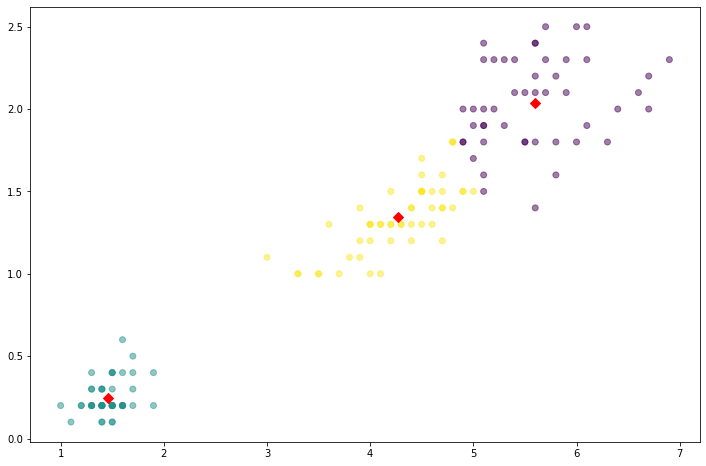

In [10]:
# 결과 확인
centers = pd.DataFrame(model.cluster_centers_,
                      columns=['petal length', 'petal width'])
center_x = centers['petal length']
center_y = centers['petal width']

plt.figure(figsize=(12, 8))
plt.scatter(feature['petal length'], feature['petal width'],
           c=feature['cluster'], alpha=0.5)
plt.scatter(center_x, center_y, s=50, marker='D', c='r')
plt.show()

#### make_blobs

In [11]:
# make_blobs
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=3,
                 cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


- 군집화 연습을 위한 데이터 생성기

In [12]:
# 데이터 정리
cluster_df = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y
cluster_df.head()

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


In [13]:
# 군집화
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=13)
cluster_labels = kmeans.fit_predict(X)
cluster_df['kmeans_label'] = cluster_labels

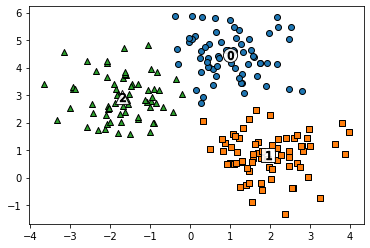

In [14]:
# 결과 도식화
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P', 'D', 'H', 'x']

for label in unique_labels:
    label_cluster = cluster_df[cluster_df['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolors='k',
               marker=markers[label])
    
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
               alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
               marker='$%d$' % label)

plt.show()

In [15]:
# 결과 확인
print(cluster_df.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        2                1
1       1               67
2       2               65
        1                1
Name: kmeans_label, dtype: int64


## 군집평가

### 군집 결과의 평가
- 분류기는 평가 기준(정답)을 가지고 있지만, 군집은 그렇지 않다.
- 군집 결과를 평가하기 위해 실루엣 분석을 많이 활용한다.

### 실루엣 분석
- 실루엣 분석은 각 군집 간의 거리가 얼마나 효율적으로 분리되어 있는지 나타냄
- 다른 군집과는 거리가 떨어져 있고, 동일 군집간의 데이터는 서로 가깝게 잘 뭉쳐 있는지 확인
- 군집화가 잘 되어 있을수록 개별 군집은 비슷한 정도의 여유공간을 가지고 있음
- 실루엣 개수: 개별 데이터가 가지는 군집화 지표

### 실습

In [17]:
# 데이터 읽기
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_df = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,
               random_state=0).fit(iris_df)

In [18]:
# 군집 결과 정리
iris_df['cluster'] = kmeans.labels_
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [19]:
# 군집 결과 평가를 위한 작업
from sklearn.metrics import silhouette_samples, silhouette_score

avg_value = silhouette_score(iris.data, iris_df['cluster'])
score_values = silhouette_samples(iris.data, iris_df['cluster'])

print('avg_value', avg_value)
print('silhouette_samples( ) return 값의 shape' , score_values.shape)

avg_value 0.5528190123564091
silhouette_samples( ) return 값의 shape (150,)


In [27]:
# yellowbrick 설치
!pip install yellowbrick

In [31]:
from yellowbrick.cluster import silhouette_visualizer
silhouette_visualizer(kmenas, iris.data, colors='yellowbrick')

ImportError: cannot import name 'available_if' from 'sklearn.utils.metaestimators' (C:\Users\seonwook\miniconda3\envs\ds_study\lib\site-packages\sklearn\utils\metaestimators.py)

In [25]:
silhouette_visualizer(kmeans, iris.data, colors='yellowbrick')

ImportError: cannot import name 'available_if' from 'sklearn.utils.metaestimators' (C:\Users\seonwook\miniconda3\envs\ds_study\lib\site-packages\sklearn\utils\metaestimators.py)